In [1]:
import sys
sys.path += [".."]

In [2]:
import rebound
import numpy as np
from scipy.special import erf

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation


from importlib import reload

In [3]:
from smbh import *
# smbh = reload(smbh)

# Constants

In [4]:
constants.setDarkMatterScaleRadius(1)
constants.SCALE_LENGTH = 0.06

print(constants.DARK_MATTER_SCALE_RADIUS, constants.DARK_MATTER_DENSITY_0)

1 3343.017837428943


In [7]:
p = 1e-6
v = 60

ps = sphericalToCartesian(p, np.pi / 4, np.pi / 4)
vs = sphericalToCartesian(v, np.pi / 4, np.pi / 4)

# Gravitational potential only

In [149]:
def gravitational_only(sim):
    pos = np.array(particle.xyz)
    r = np.linalg.norm(pos)
    coeff = -constants.G * (darkMatterMass(r) + baryonicMassHernquist(r)) / (r ** 2)
    dir_ = pos / r
    
    particle.ax += coeff * dir_[0]
    particle.ay += coeff * dir_[1]
    particle.az += coeff * dir_[2]

In [150]:
sim, particle = setupSimulation(1, ps, vs, gravitational_only, velocity_dependent = 0)
sim.dt = 1e-6
sim.integrator = 'leapfrog'
times_g, positions_g, speeds_g = runSimulation(sim, particle, 10000)

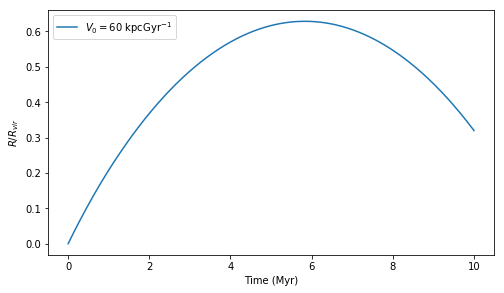

In [151]:
fig, ax = plotDistance(times_g, positions_g)
ax.legend(["$V_0 = %d$ kpcGyr$^{-1}$"%v])

# fig.savefig("gravitational_only.png", dpi = 300)
plt.show()

# DM dynamical friction

In [94]:
mass = 1

def gravitational_DF(sim):
    global mass
    pos = np.array(particle.xyz)
    speed = np.array(particle.vxyz)
    r = np.linalg.norm(pos)
    
    dir_ = pos / r
    grav = -constants.G * (darkMatterMass(r) + baryonicMassHernquist(r)) / (r ** 2)
    
    df = dynamicalFrictionDM(pos, speed, mass) + dynamicalFrictionGas(pos, speed, mass)
    m_change = SMBHAccretion(pos, speed, mass)
    v = np.linalg.norm(speed)
    accretion = v * m_change / mass
    if v < 1e-6:
        print(df)
#         if sim.contents.t > 0.012:
#             print(df, v, accretion)
#     else:
#         df = dynamicalFrictionGas(pos, speed, mass) #[0, 0, 0]
#         accretion = 0
    
    particle.ax += (grav + accretion) * dir_[0] + df[0]
    particle.ay += (grav + accretion) * dir_[1] + df[1]
    particle.az += (grav + accretion) * dir_[2] + df[2]

In [95]:
sim, particle = setupSimulation(1, ps, vs, gravitational_DF)
sim.dt = 1e-7
sim.integrator = 'leapfrog'

times_df, positions_df, speeds_df = runSimulation(sim, particle, 400000)#int(2 * 100 * 12000))

In [96]:
fig, ax = plotDistance(times_df, positions_df)#, ax = ax)

# ax.set_xlim(12, 25)
ax.set_ylim(0, 1)
# fig.savefig("gravitational_DF_dt1e-7_d1_b006.png", dpi = 300)
plt.show()

In [57]:
df_dm = dynamicalFrictionDM(positions_df, speeds_df, 1)

In [74]:
plt.plot(np.linalg.norm(df_dm, axis = 1))
# plt.ylim(0, 0.01)
# plt.xlim(13.134, 13.14)
# %matplotlib

In [63]:
np.linalg.norm(speeds_df, axis = 1).argmin()

41178

In [64]:
speeds_df[41178]

array([-1.98678625e-06, -1.98678625e-06, -2.80974003e-06])

# STOP

In [ ]:
rs = sphericalToCartesian(1e-3, 0, 0)

Vs = [280, 281]

times = []
positions = []
speeds = []

for vs in Vs:
    vs = sphericalToCartesian(vs, np.pi / 4, np.pi / 4)
    sim, particle = setupSimulation(1, rs, vs, gravitational_DM_DF)
    t, p, s = runSimulation(sim, particle, 2000)
    times.append(t)
    positions.append(p)
    speeds.append(s)

In [ ]:
fig, ax = plotDistance(times[0], positions[0])
fig, ax = plotDistance(times[1], positions[1], ax = ax)

ax.legend(["$V_0 = 280$ kpcGyr$^{-1}$",
           "$V_0 = 281$ kpcGyr$^{-1}$"])
plt.show()